In [10]:
# importing libraries    
import numpy as nm    
import matplotlib.pyplot as mtp    
import pandas as pd   
from sklearn.cluster import DBSCAN
from numpy import unique
from numpy import where
from matplotlib import pyplot

In [11]:
# Importing the dataset  
dataset = pd.read_csv('data.csv')
dataset.drop(dataset.index[dataset['game'] == 'Alternating'], inplace = True)
dataset.drop(dataset.index[dataset['game'] == 'Divided'], inplace = True)
dataset.drop(dataset.index[dataset['game'] == 'Focused'], inplace = True)
dataset.drop(dataset.index[dataset['game'] == 'Selective'], inplace = True)
display(dataset)
# statistics of the data
# dataset.describe()

,id,child_gender,child_age,total_correct_responses,correct_responses,commission_errors,omission_errors,mean_reaction_time,total_duration,diagnosis,percentage_no_of_correct_responses,oer,cer,game,Unnamed: 14
324,325,2,4,20,16,0,4,1500,132928,No,80.000000,20.000000,0.0,Sustained,NaN
325,326,1,4,20,18,0,2,1472,133598,No,90.000000,10.000000,0.0,Sustained,NaN
326,327,2,4,31,28,0,3,1523,203243,No,90.322581,9.677419,0.0,Sustained,NaN
327,328,2,4,13,12,0,1,1267,86043,No,92.307692,7.692308,0.0,Sustained,NaN
328,329,2,4,7,7,0,0,1501,46708,No,100.000000,0.000000,0.0,Sustained,NaN
329,330,1,4,17,15,0,2,1369,114319,No,88.235294,11.764706,0.0,Sustained,NaN
330,331,1,4,15,13,0,2,998,95887,No,86.666667,13.333333,0.0,Sustained,NaN
331,332,1,4,4,3,0,1,1655,25196,No,75.000000,25.000000,0.0,Sustained,NaN
332,333,2,5,34,33,0,1,1296,220070,No,97.058824,2.941176,0.0,Sustained,NaN
333,334,2,5,7,5,0,2,1173,44919,No,71.428571,28.571429,0.0,Sustained,NaN


In [12]:
x = dataset.iloc[:, [8]].values  
display(x)

array([[132928],
       [133598],
       [203243],
       [ 86043],
       [ 46708],
       [114319],
       [ 95887],
       [ 25196],
       [220070],
       [ 44919],
       [ 86529],
       [ 33134],
       [106353],
       [ 85407],
       [  8137],
       [ 10332],
       [ 65582],
       [ 16803],
       [ 56454],
       [ 53730],
       [ 93980],
       [107652],
       [ 71768],
       [  2558],
       [  9306],
       [  9653],
       [ 24272],
       [ 37485],
       [ 35262],
       [ 76797],
       [ 45086],
       [ 84117],
       [114481],
       [105494],
       [  2192],
       [  2125],
       [179629],
       [ 96133],
       [102242]], dtype=int64)

In [13]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df = scaler.fit_transform(x)

# statistics of scaled data
pd.DataFrame(new_df).describe()

display(new_df)

array([[ 1.12219377],
       [ 1.13462618],
       [ 2.42694693],
       [ 0.2522037 ],
       [-0.47768986],
       [ 0.77688834],
       [ 0.43486729],
       [-0.87686286],
       [ 2.73918587],
       [-0.51088624],
       [ 0.26122183],
       [-0.72956669],
       [ 0.6290726 ],
       [ 0.24040219],
       [-1.19340676],
       [-1.15267672],
       [-0.12746713],
       [-1.03260194],
       [-0.29684474],
       [-0.34739082],
       [ 0.39948132],
       [ 0.65317662],
       [-0.01268077],
       [-1.29692973],
       [-1.171715  ],
       [-1.16527612],
       [-0.89400845],
       [-0.64883027],
       [-0.69007988],
       [ 0.0806365 ],
       [-0.50778741],
       [ 0.21646517],
       [ 0.77989438],
       [ 0.61313314],
       [-1.30372117],
       [-1.30496441],
       [ 1.98876957],
       [ 0.43943202],
       [ 0.55278958]])

In [14]:
'''
x = dataset.iloc[:, [2, 7]].copy()
x['mean_reaction_time'] = new_df
x.head()
x = x.to_numpy()
display(x)
'''

"\nx = dataset.iloc[:, [2, 7]].copy()\nx['mean_reaction_time'] = new_df\nx.head()\nx = x.to_numpy()\ndisplay(x)\n"

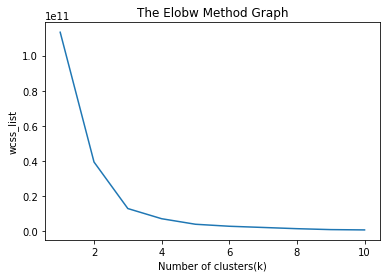

In [15]:
# Finding the optimal number of clusters using the elbow method
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 11), wcss_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()

In [16]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  
print(y_predict)

#visulaizing the clusters  
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster    
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters of children')  
mtp.ylabel('Total Duration')  
mtp.xlabel('Age')  
mtp.legend()  
mtp.show()  

[0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0
 0 0]


IndexError: index 1 is out of bounds for axis 1 with size 1

In [7]:
new_df = dataset.iloc[:, [2, 8]].copy()
new_df['clusters'] = y_predict
new_df.head()
display(new_df)

,child_age,total_duration,clusters
324,4,132928,1
325,4,133598,1
326,4,203243,1
327,4,86043,1
328,4,46708,1
329,4,114319,1
330,4,95887,1
331,4,25196,1
332,5,220070,1
333,5,44919,0


# Cluster Analysis

## Cluster 1

In [8]:
len(new_df[new_df["clusters"] == 0])

26

In [9]:
cluster_1 = new_df[new_df["clusters"] == 0 ]

maxVal = cluster_1['total_duration'].max()
minVal = cluster_1['total_duration'].min()

print(minVal)
print(maxVal)

2125
179629


,child_age,total_duration,clusters
333,5,44919,0
335,5,33134,0
338,5,8137,0
339,5,10332,0
341,6,16803,0
342,6,56454,0
343,6,53730,0
344,6,93980,0
345,6,107652,0
346,6,71768,0


<AxesSubplot:>

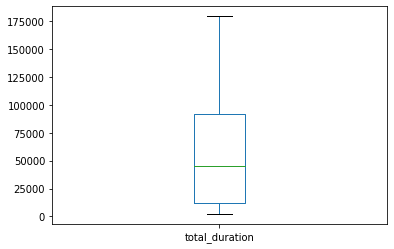

In [10]:
display(cluster_1)
cluster_1.boxplot(column =['total_duration'], grid = False)

## Cluster 2

In [11]:
len(new_df[new_df["clusters"] == 1])

13

In [12]:
cluster_2 = new_df[new_df["clusters"] == 1 ]

maxVal = cluster_2['total_duration'].max()
minVal = cluster_2['total_duration'].min()

print(minVal)
print(maxVal)

25196
220070


,child_age,total_duration,clusters
324,4,132928,1
325,4,133598,1
326,4,203243,1
327,4,86043,1
328,4,46708,1
329,4,114319,1
330,4,95887,1
331,4,25196,1
332,5,220070,1
334,5,86529,1


<AxesSubplot:>

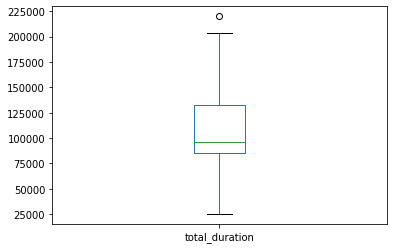

In [13]:
display(cluster_2)
cluster_2.sort_values('total_duration')
cluster_2.boxplot(column =['total_duration'], grid = False)

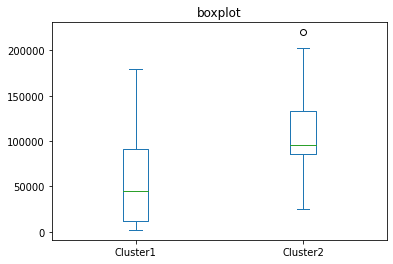

In [15]:
from matplotlib import pyplot as plt

# Pandas dataframe
data = pd.DataFrame({"Cluster1": cluster_1['total_duration'], "Cluster2": cluster_2['total_duration']})

# Plot the dataframe
ax = data[['Cluster1', 'Cluster2']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

## Cluster 3

In [20]:
len(new_df[new_df["clusters"] == 2])

98

In [21]:
cluster_3 = new_df[new_df["clusters"] == 2 ]

maxVal = cluster_3['total_duration'].max()
minVal = cluster_3['total_duration'].min()

print(minVal)
print(maxVal)

3000
19886


,child_age,total_duration,clusters
160,4,3459,2
161,4,3000,2
162,4,10888,2
163,4,7081,2
164,4,9953,2
...,...,...,...
261,5,9059,2
262,5,10000,2
263,5,12889,2
266,5,19886,2


<AxesSubplot:>

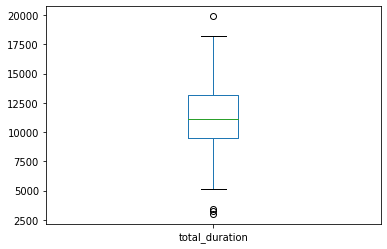

In [22]:
display(cluster_3)
cluster_3.sort_values('total_duration')
cluster_3.boxplot(column =['total_duration'], grid = False)

In [14]:
from matplotlib import pyplot as plt

# Pandas dataframe
data = pd.DataFrame({"Cluster1": cluster_1['total_duration'], "Cluster2": cluster_2['total_duration'], "Cluster3": cluster_3['total_duration']})

# Plot the dataframe
ax = data[['Cluster1', 'Cluster2', 'Cluster3']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

NameError: name 'cluster_3' is not defined